In [1]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
new_df = file_to_dataframe(path_antoine + 'new_datas_diff_%.csv')

In [3]:
from sklearn.decomposition import PCA

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)  # Remplacez X par vos données

# ACP
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(df_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [5]:
from sklearn.metrics import silhouette_score

In [6]:
# Échantillonnage des données pour accélérer le calcul
np.random.seed(42)
indices = np.random.choice(range(len(df_scaled)), size=int(len(df_scaled) * 0.1), replace=False)
sample = df_scaled[indices]


In [7]:

# Calcul du score de silhouette pour différents nombres de clusters
silhouette_scores = []
for k in range(2, 11):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_score(sample, kmeans.labels_)
    silhouette_scores.append(score)


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

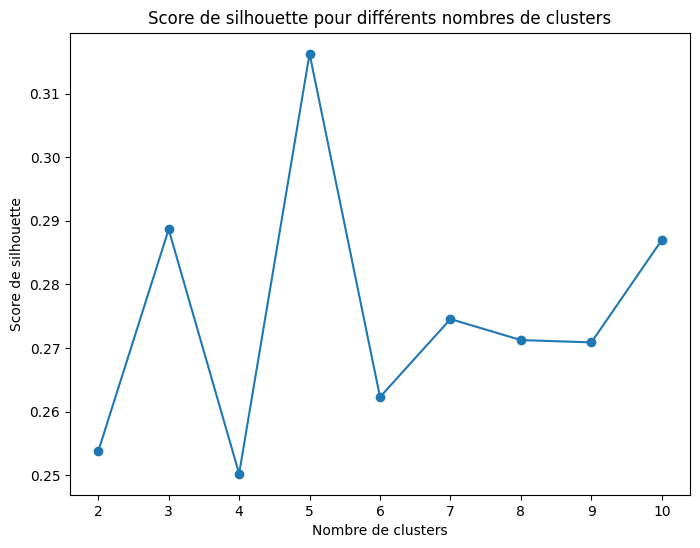

In [8]:

# Visualisation des scores de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

In [9]:
silhouette_scores2 = []
for k in range(11, 15):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_score(sample, kmeans.labels_)
    silhouette_scores2.append(score)

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

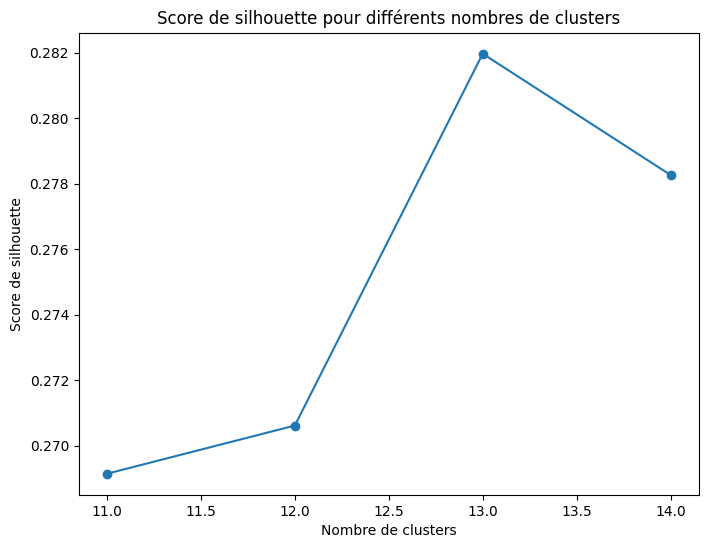

In [10]:
# Visualisation des scores de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(11, 15), silhouette_scores2, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()